/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_45790/1615899592.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  steps_df = pd.read_csv(steps_path)


Correlation between daily step size and exam dates: 0.10747559818501606


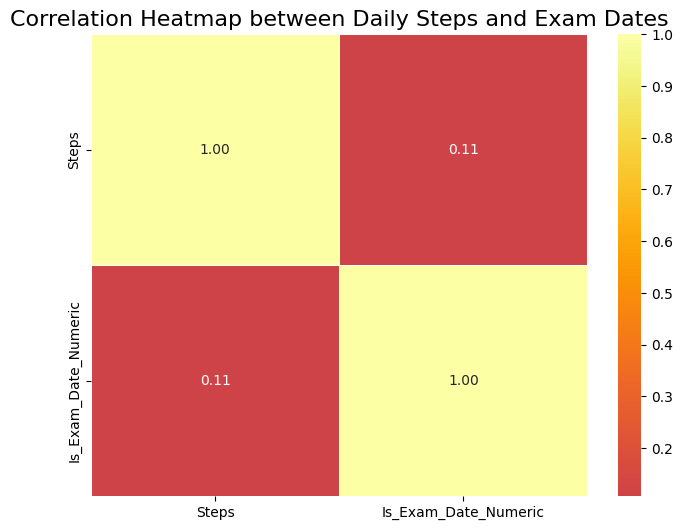

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

calendar_path = '/Users/armanibrisim/Desktop/proje/calendar_export.csv'
steps_path = '/Users/armanibrisim/Desktop/proje/apple_health_data.csv'

calendar_df = pd.read_csv(calendar_path)
steps_df = pd.read_csv(steps_path)

calendar_df['Start'] = pd.to_datetime(calendar_df['Start'])
calendar_df['Date'] = calendar_df['Start'].dt.date
exam_dates = set(calendar_df['Date'])

steps_df = steps_df[steps_df['type'] == 'HKQuantityTypeIdentifierStepCount']
steps_df['startDate'] = pd.to_datetime(steps_df['startDate'])
steps_df['Date'] = steps_df['startDate'].dt.date
steps_df['Steps'] = steps_df['value'].astype(float)

daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()
daily_steps['Is_Exam_Date'] = daily_steps['Date'].isin(exam_dates)

daily_steps['Is_Exam_Date_Numeric'] = daily_steps['Is_Exam_Date'].astype(int)

correlation = daily_steps['Steps'].corr(daily_steps['Is_Exam_Date_Numeric'])
print(f"Correlation between daily step size and exam dates: {correlation}")

correlation_matrix = daily_steps[['Steps', 'Is_Exam_Date_Numeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', cbar=True, linewidths=0.5, center=0)
plt.title('Correlation Heatmap between Daily Steps and Exam Dates', fontsize=16)
plt.show()


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_45790/2580261902.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


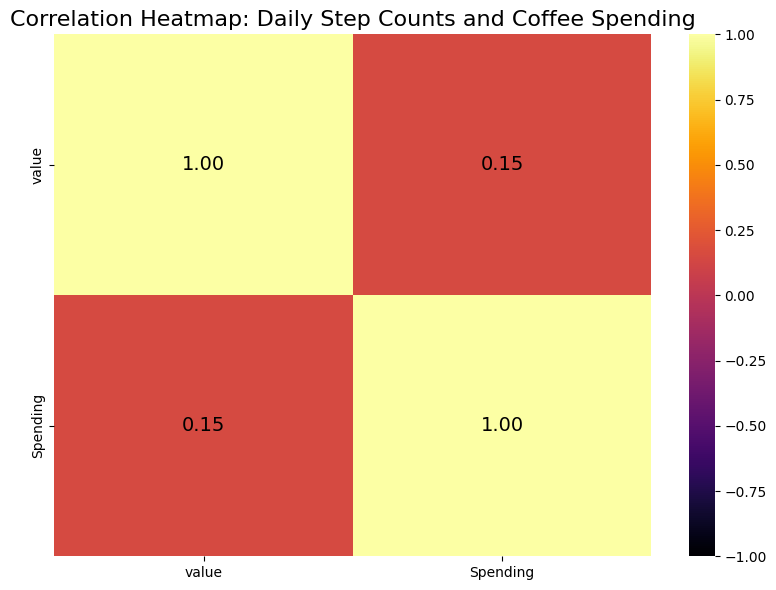

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    df['startDate'] = pd.to_datetime(df['startDate'])

    df = df[(df['startDate'] >= '2023-09-01')]

    df['date'] = df['startDate'].dt.date
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return daily_steps

def load_and_process_coffee_data(csv_file):
    data = pd.read_csv(csv_file, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    data = data[data['Date'] != 'Date'] 

    data['Date'] = pd.to_datetime(data['Date'])

    spending_map = {
        'STARBUCKS': 100,
        'COFFY': 60,
        'BREKKIE': 150,
        'MORN': 200,
        'PETRA': 200
    }
    
    data['Spending'] = data.apply(lambda row: row['Amount'] * spending_map.get(row['Place'], 0), axis=1)
    daily_spending = data.groupby('Date')['Spending'].sum().reset_index()

    return daily_spending

step_csv_file = '/Users/armanibrisim/Desktop/proje/apple_health_data.csv'
coffee_csv_file = '/Users/armanibrisim/Desktop/proje/spending_data1.csv'

daily_steps = load_and_process_data(step_csv_file)
daily_spending = load_and_process_coffee_data(coffee_csv_file)

daily_steps['date'] = pd.to_datetime(daily_steps['date'])
daily_spending['Date'] = pd.to_datetime(daily_spending['Date'])

merged_data = pd.merge(daily_steps, daily_spending, left_on='date', right_on='Date', how='inner')


correlation_matrix = merged_data[['value', 'Spending']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', cbar=True,
            annot_kws={'size': 14, 'color': 'black'}, vmin=-1, vmax=1)

plt.title('Correlation Heatmap: Daily Step Counts and Coffee Spending', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_45790/42080563.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


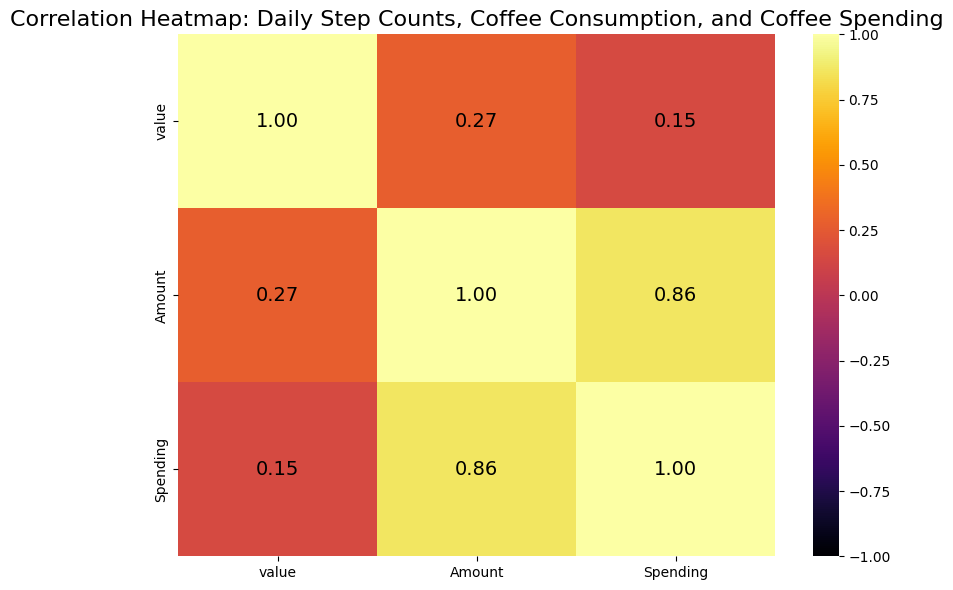

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    df['startDate'] = pd.to_datetime(df['startDate'])

    df = df[(df['startDate'] >= '2023-09-01')]

    df['date'] = df['startDate'].dt.date
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return daily_steps

def load_and_process_coffee_data(csv_file):
    data = pd.read_csv(csv_file, sep=';', skiprows=1, names=['Date', 'Place', 'Amount'])
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    data = data[data['Date'] != 'Date']

    data['Date'] = pd.to_datetime(data['Date'])

    spending_map = {
        'STARBUCKS': 100,
        'COFFY': 60,
        'BREKKIE': 150,
        'MORN': 200,
        'PETRA': 200
    }
    
    data['Spending'] = data.apply(lambda row: row['Amount'] * spending_map.get(row['Place'], 0), axis=1)
    daily_coffee_consumption = data.groupby('Date')['Amount'].sum().reset_index()
    daily_spending = data.groupby('Date')['Spending'].sum().reset_index()

    return daily_coffee_consumption, daily_spending

step_csv_file = 'apple_health_data.csv'  
coffee_csv_file = 'spending_data1.csv'  

daily_steps = load_and_process_data(step_csv_file)
daily_coffee, daily_spending = load_and_process_coffee_data(coffee_csv_file)

daily_steps['date'] = pd.to_datetime(daily_steps['date'])
daily_coffee['Date'] = pd.to_datetime(daily_coffee['Date'])
daily_spending['Date'] = pd.to_datetime(daily_spending['Date'])

merged_data = pd.merge(daily_steps, daily_coffee[['Date', 'Amount']], left_on='date', right_on='Date', how='inner')
merged_data = pd.merge(merged_data, daily_spending[['Date', 'Spending']], on='Date', how='inner')

correlation_matrix = merged_data[['value', 'Amount', 'Spending']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', cbar=True,
            annot_kws={'size': 14, 'color': 'black'}, vmin=-1, vmax=1)

plt.title('Correlation Heatmap: Daily Step Counts, Coffee Consumption, and Coffee Spending', fontsize=16)
plt.tight_layout()
plt.show()
